In [866]:
#the following code were taken from sklearn documentation for each of the model
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
import time
from sklearn import metrics
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, validation_curve, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
import matplotlib.pyplot as plt

In [867]:
warnings.filterwarnings('ignore')
print(time.time())

1664141054.952744


In [868]:
#import data
cancer_df = pd.read_csv('/Users/qingzhou/Desktop/GT_OMSCS/Machine_Learning_CS7641/assignment_1/breast-cancer-wisconsin.data'
                        ,names = ['id', 'thickness', 'uniform_size', 'uniform_shape', 'adhesion', 'single_cell_size'
                                                          , 'nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'Diagnosis'])
#change class to 0 and 1
cancer_df['Diagnosis'].mask(cancer_df['Diagnosis'] == 2, 0, inplace= True)
cancer_df['Diagnosis'].mask(cancer_df['Diagnosis'] == 4, 1, inplace= True)
#replace missing values
#cancer_df.isnull().sum()
#get mean value in nuclei
# print(cancer_df.replace('?', np.NaN).mean(skipna= True))
#print(cancer_df[cancer_df['nuclei'].isnull()])
#replace ? with 3 
cancer_df['nuclei'].mask(cancer_df['nuclei']== '?', 3, inplace = True)
# print(cancer_df[cancer_df['nuclei']=='?'])
#remove id from data point

cancer_df = cancer_df[['thickness', 'uniform_size', 'uniform_shape', 'adhesion', 'single_cell_size'
                                                          , 'nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'Diagnosis']]
#x and y dataset
x_features = ['thickness', 'uniform_size', 'uniform_shape', 'adhesion', 'single_cell_size'
                                                          , 'nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']
y_output = ['Diagnosis']
cancer_df_x = cancer_df[x_features]
cancer_df_y = cancer_df[y_output]
class_name = ['Benign', 'Malignant']
#kfold
kf = KFold(n_splits=4)
cancer_df.head()


,thickness,uniform_size,uniform_shape,adhesion,single_cell_size,nuclei,chromatin,normal_nucleoli,mitoses,Diagnosis
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [869]:
results=[['Precision', 'Recall', 'Accuracy', 'Balanced Accuracy','Time']]


Text(0.5, 1.0, 'Cancer Data Heatmap')

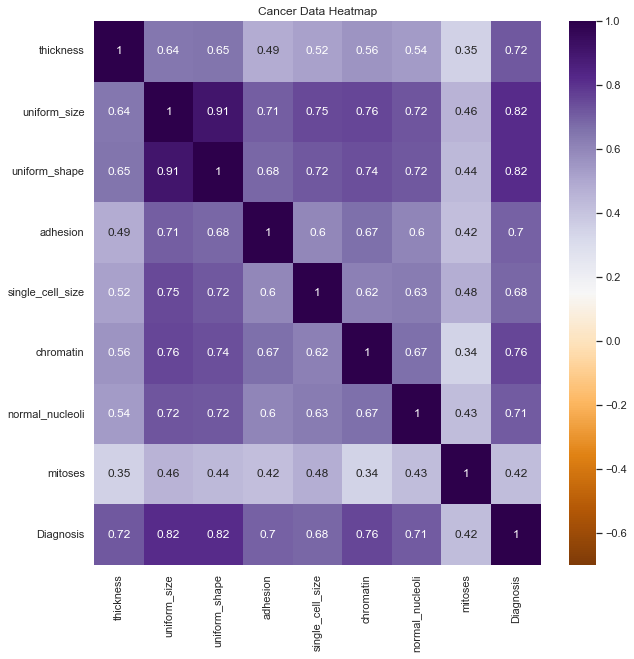

In [870]:
sns.set(rc={'figure.figsize':(10,10)})
ax = plt.axes()
sns.heatmap(cancer_df.corr(), annot=True, ax =ax, linecolor="white",vmin=-0.7, cmap="PuOr")
ax.set_title('Cancer Data Heatmap')

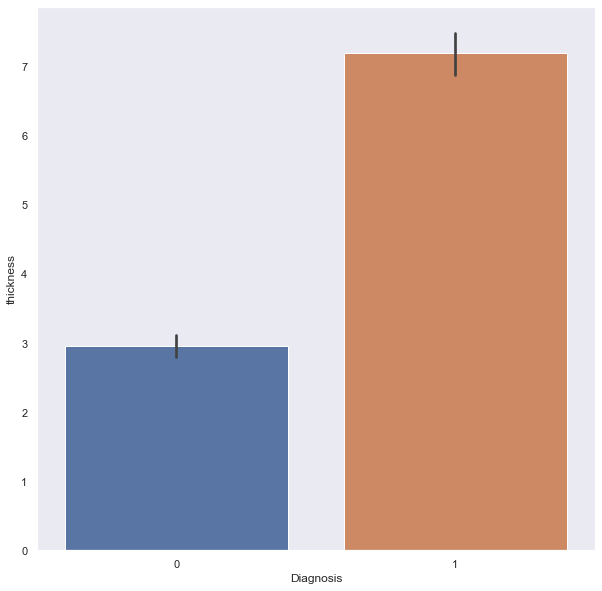

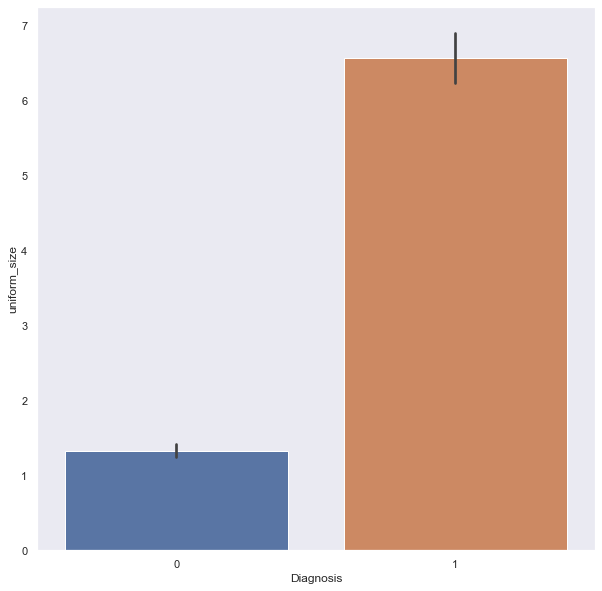

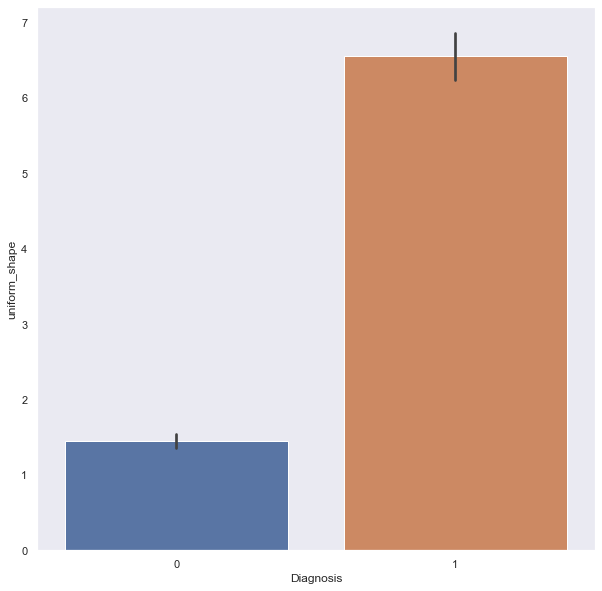

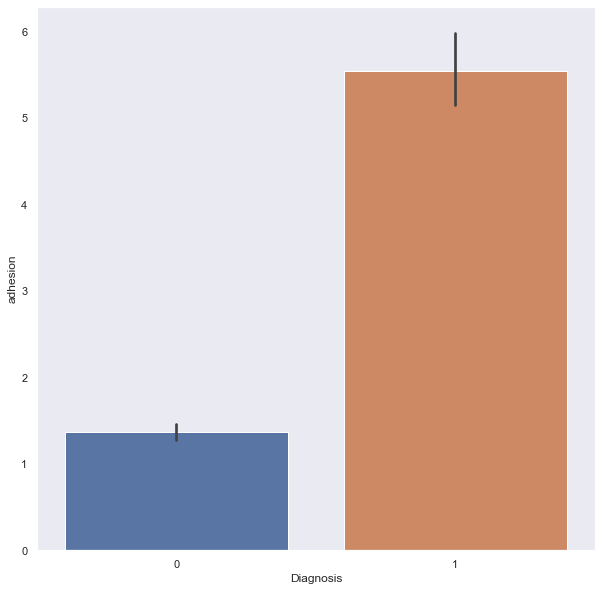

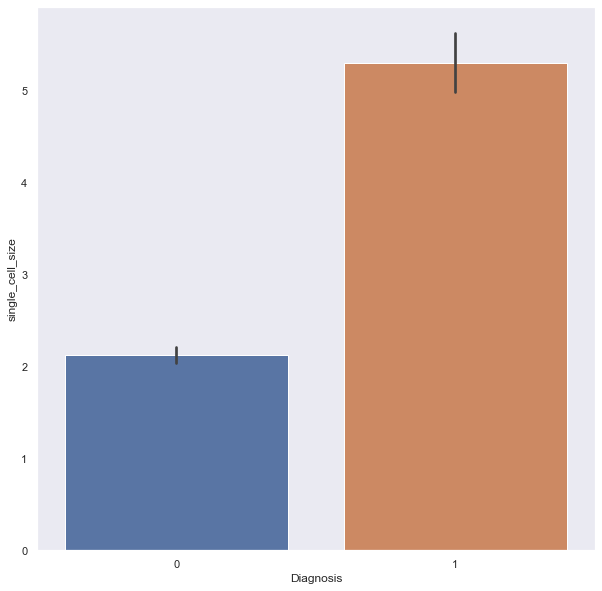

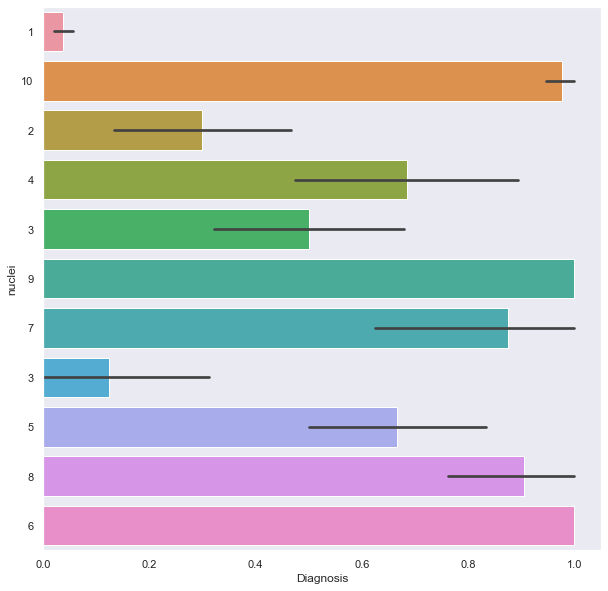

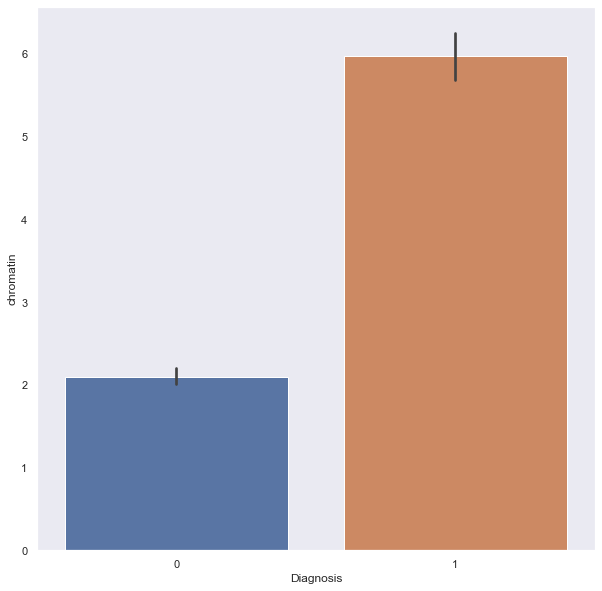

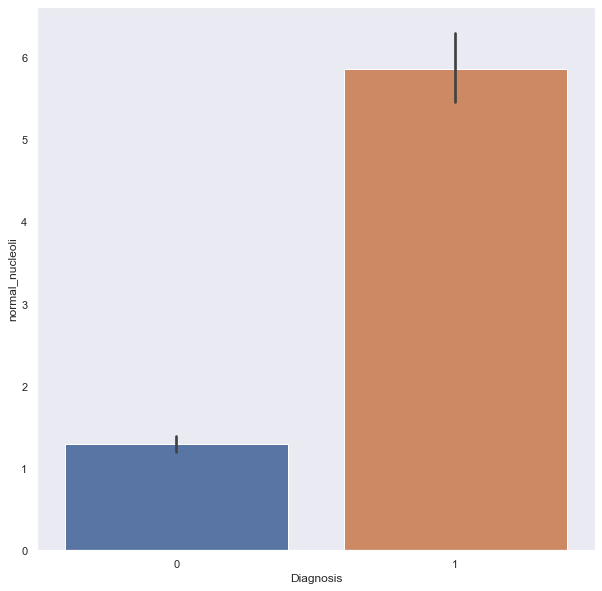

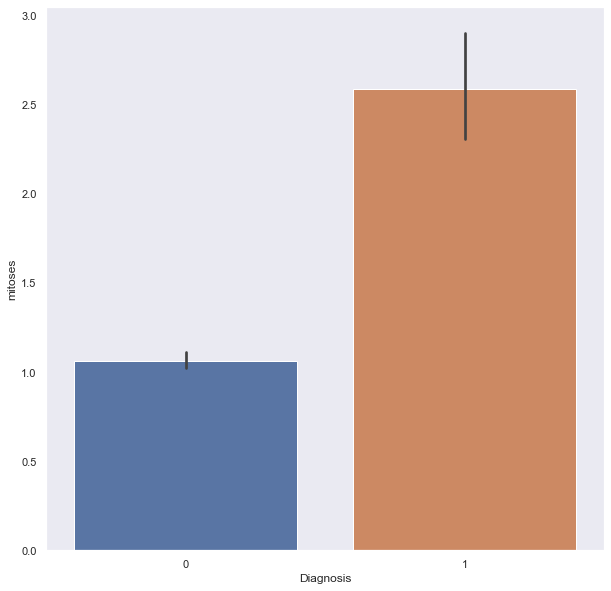

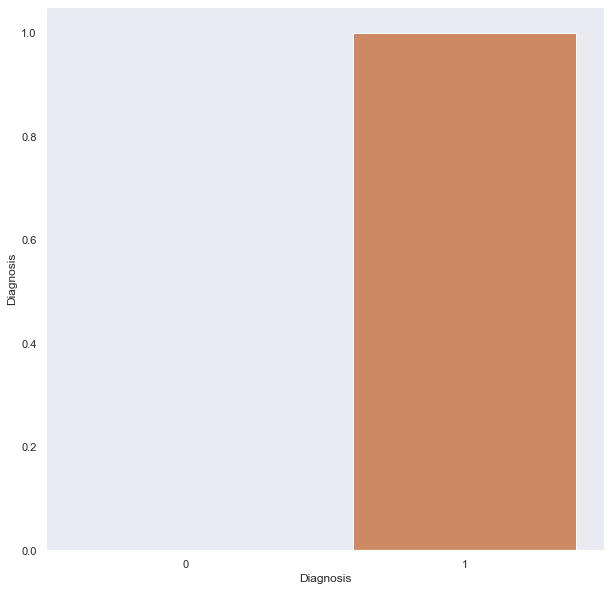

In [871]:
for i, col in enumerate(cancer_df.columns):
    plt.figure(i)
    plt.grid(False)
    sns.barplot(x='Diagnosis', y=col, data=cancer_df)

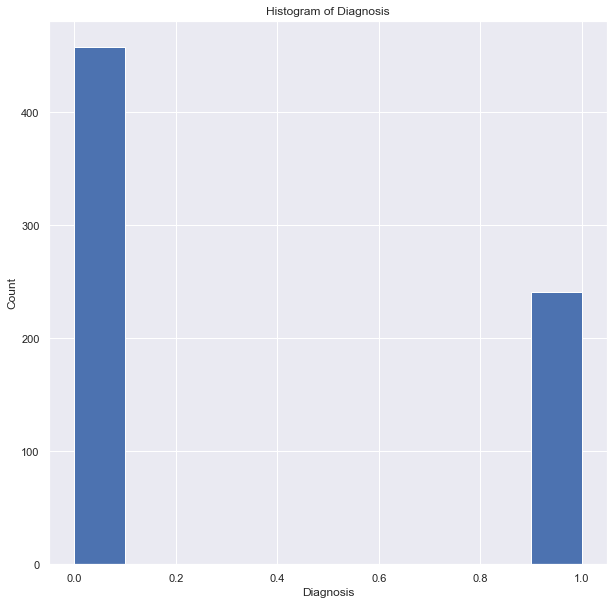

In [872]:
#Distribution of samples
plt.hist(cancer_df_y)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Histogram of Diagnosis')
plt.show()

In [873]:
CX_train, CX_test, CY_train, CY_test = train_test_split(cancer_df_x, cancer_df_y, test_size=0.2)


In [874]:
def prediction(pred, y):
    return metrics.precision_score(y, pred), metrics.recall_score(y, pred), metrics.accuracy_score(y, pred), metrics.confusion_matrix(y, pred), metrics.balanced_accuracy_score(y, pred)

In [875]:
def valid(model, x, y, param, prange, folds, model_name, xlab):
    train, val = validation_curve(model, x, y, param_name=param, param_range=prange, cv=folds)
    train_mean = np.mean(train, axis=1)
    train_std = np.std(train, axis=1)
    val_mean = np.mean(val, axis=1)
    val_std = np.std(val, axis=1)
    
    plt.grid(False)
    plt.title("Validation Curve with "+ model_name)
    plt.xlabel(xlab)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(
        prange, train_mean, label="Training score", color="navy", lw=lw
    )
    plt.fill_between(
        prange,
        train_mean - train_std,
        train_mean + train_std,
        alpha=0.2,
        color="navy",
        lw=lw,
    )
    plt.semilogx(
        prange, val_mean, label="Cross-validation score", color="darkorange", lw=lw
    )
    plt.fill_between(
        prange,
        val_mean - val_std,
        val_mean + val_std,
        alpha=0.2,
        color="darkorange",
        lw=lw,
    )
    plt.legend(loc="best")
    return train, val


In [876]:
def learning(model, x, y, folds, model_name):
    
    size, train, val, fit, _ = learning_curve(model, x, y, cv=folds, return_times=True)
    _, axes = plt.subplots(1, 3, figsize=(20, 5))
    plt.grid(False)
    axes[0].set_title('Learning Curve of ' + model_name)
    axes[0].set_xlabel("Training Number")
    axes[0].set_ylabel("Accuracy")
#     print(train)
#     print(val)
    train_mean = np.mean(train, axis=1)
    train_std = np.std(train, axis=1)
    val_mean = np.mean(val, axis=1)
    val_std = np.std(val, axis=1)
    fit_mean = np.mean(fit, axis=1)
    fit_std = np.std(fit, axis=1)
    axes[0].grid()
    axes[0].fill_between(
        size,
        train_mean - train_std,
        train_mean + train_std,
        alpha=0.1,
        color="darkorange",
    )
    axes[0].fill_between(
        size,
        val_mean - val_std,
        val_mean + val_std,
        alpha=0.1,
        color="navy",
    )
    axes[0].plot(
        size, train_mean, "o-", color="darkorange", label="Training Accuracy"
    )
    axes[0].plot(
        size, val_mean, "o-", color="navy", label="Cross-validation Accuracy"
    )
    axes[0].legend(loc="best")
    # Plot n_samples vs fit_times
    plt.grid(False)
    axes[1].grid()
    axes[1].plot(size, fit_mean, "o-")
    axes[1].fill_between(
        size,
        fit_mean - fit_std,
        fit_mean + fit_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training Number")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the "+ model_name)

    # Plot fit_time vs score
    fit_argsort = fit_mean.argsort()
    fit_sorted = fit_mean[fit_argsort]
    val_mean_sorted = val_mean[fit_argsort]
    val_std_sorted = val_std[fit_argsort]
    plt.grid(False)
    axes[2].grid()
    axes[2].plot(fit_sorted, val_mean_sorted, "o-")
    axes[2].fill_between(
        fit_sorted,
        val_mean_sorted - val_std_sorted,
        val_mean_sorted + val_std_sorted,
        alpha=0.1,
    )
    plt.grid(False)
    axes[2].set_xlabel("Fit Times")
    axes[2].set_ylabel("Accuracy")
    axes[2].set_title("Performance of the "+ model_name)

In [877]:
def dt(x,y, x_test, y_test):
    #set up model
    model = DecisionTreeClassifier(random_state=0)
    #validation curve
    train, val = valid(model, cancer_df_x, cancer_df_y,'max_depth', [1,1000], 5, 'Decision Tree', 'Depth' )
    #learning curve
    model = DecisionTreeClassifier(random_state=0, max_depth = 30)
    learning(model, cancer_df_x, cancer_df_y, 5, 'Decision Tree')
    #purning 
    
    path = model.cost_complexity_pruning_path(x,y)
    alphas, impurities =  path.ccp_alphas, path.impurities
    
    #plot alpha to impurity
    fig, ax = plt.subplots()
    plt.grid(False)
    ax.plot(alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
    ax.set_xlabel("Effective Alpha")
    ax.set_ylabel("Total Impurity of Leaves")
    ax.set_title("Total Impurity vs Fffective Alpha for Training set")
    
    #store model fitting
    models = []
    for a in alphas:
        model = DecisionTreeClassifier(random_state=0, ccp_alpha=a, max_depth = 30)
        model.fit(x,y)
        models.append(model)
    #remove one node from alphas and output
    models = models[:-1]
    alphas = alphas[:-1]
    node_counts = [model.tree_.node_count for model in models]
    depth = [model.tree_.max_depth for model in models]
    start = time.time()
    models[11].fit(x,y)
    wall_time = time.time() - start
    #plot alpha to node
    fig, ax = plt.subplots(2,1)
    ax[0].grid(False)
    ax[0].plot(alphas, node_counts, marker="o", drawstyle="steps-post")
    ax[0].set_xlabel("Alpha")
    ax[0].set_ylabel("Number of Nodes")
    ax[0].set_title("Number of Nodes vs Alpha")
    #plot alpha to depth
    plt.grid(False)
    ax[1].plot(alphas, depth, marker="o", drawstyle="steps-post")
    ax[1].set_xlabel("Alpha")
    ax[1].set_ylabel("Depth of Tree")
    ax[1].set_title("Depth vs Alpha")
    fig.tight_layout()
    
    train_scores = [model.score(x, y) for model in models]
    test_scores = [model.score(x_test, y_test) for model in models]
    fig, ax = plt.subplots()
    plt.grid(False)
    ax.set_xlabel("Alpha")
    ax.set_ylabel("Accuracy")
    ax.set_title("Accuracy vs Alpha for Training and Validation sets")
    ax.plot(alphas, train_scores, marker="o", label="Train", drawstyle="steps-post")
    ax.plot(alphas, test_scores, marker="o", label="Validation", drawstyle="steps-post")
    ax.legend()
    #calculate performance
    pre, rec, acc, m_node, m_dep, i, mtx, bacc = 0, 0 ,0, 0, 0, 0, [], 0
    for model, node, dep in zip(models, node_counts, depth):
        temp4, temp5 = node, dep
        pred = model.predict(x_test)
#         print('Number of Nodes :', node, 'Depth: ', dep)
        temp1, temp2, temp3, temp6, temp7 = prediction(pred, y_test)
        if pre < temp1:
            i = models.index(model)
            pre, rec, acc, m_node, m_dep, mtx, bacc = temp1, temp2, temp3, temp4, temp5, temp6, temp7
    print('Number of Nodes :', m_node, 'Depth: ', m_dep)
    print('Precision: ',  pre)
    results.append([pre, rec, acc, bacc, wall_time])
    print('Recall: ',  rec)
    print('Accuracy: ',  acc)
    
    print('Balanced Accuracy: ', bacc)
    print(mtx)
    print(i)
    print('Wall time: ', wall_time)
    
    return models, i

Number of Nodes : 9 Depth:  3
Precision:  0.9629629629629629
Recall:  0.9285714285714286
Accuracy:  0.9571428571428572
Balanced Accuracy:  0.9523809523809523
[[82  2]
 [ 4 52]]
12
Wall time:  0.001940011978149414


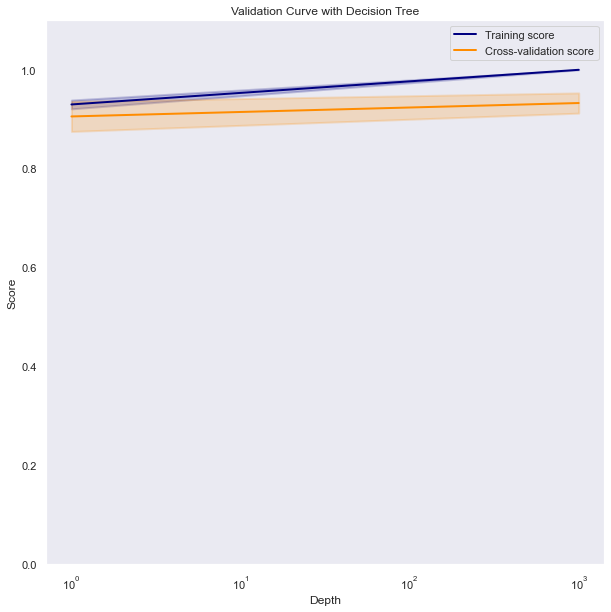

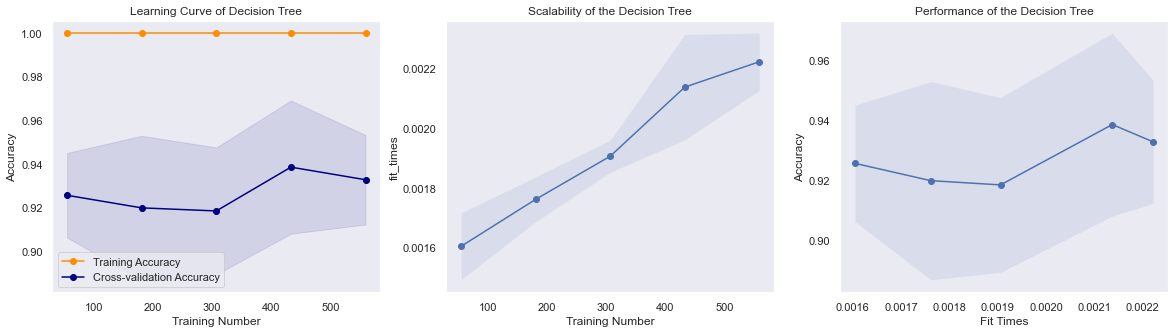

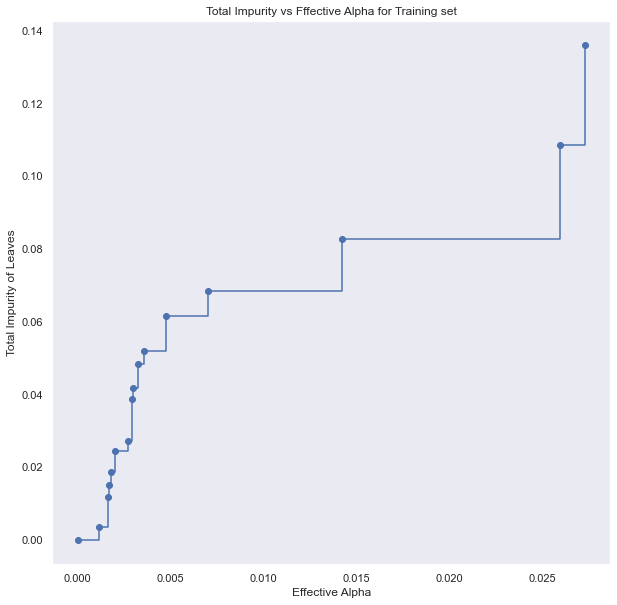

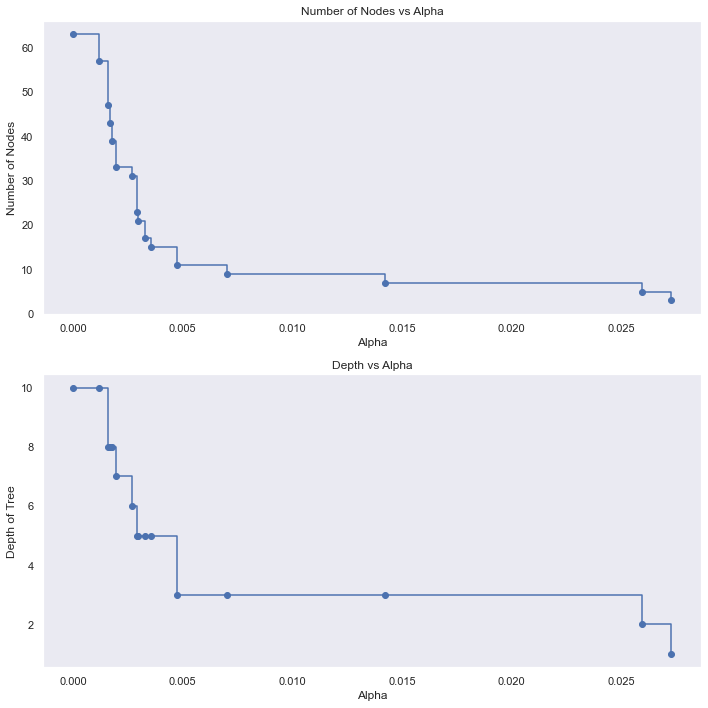

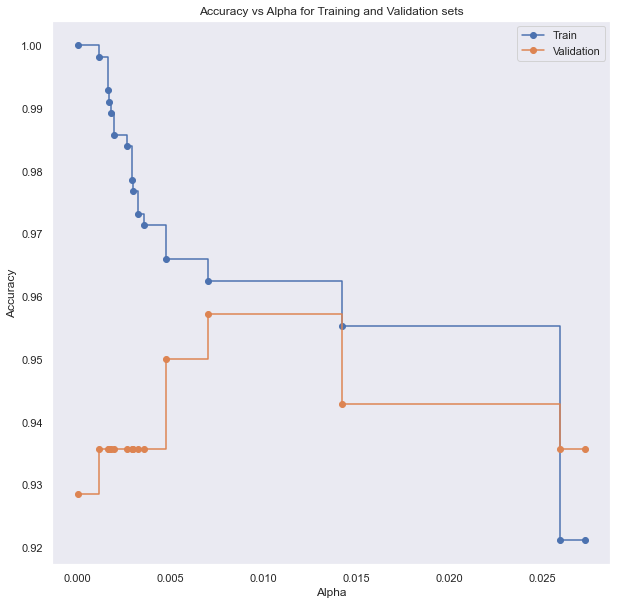

In [878]:
dt_output, idx= dt(CX_train, CY_train, CX_test, CY_test)

# cancer_np_x = cancer_df_x.to_numpy()
# cancer_np_y = cancer_df_y.to_numpy()
# # for train_idx, test_idx in kf.split(cancer_np_x):
#     X_train, X_test =  cancer_np_x[train_idx], cancer_np_x[test_idx]
#     Y_train, Y_test = cancer_np_y[train_idx], cancer_np_y[test_idx]
#     dt(X_train, Y_train, X_test, Y_test)
# prediction(cancer_pred, CY_test)


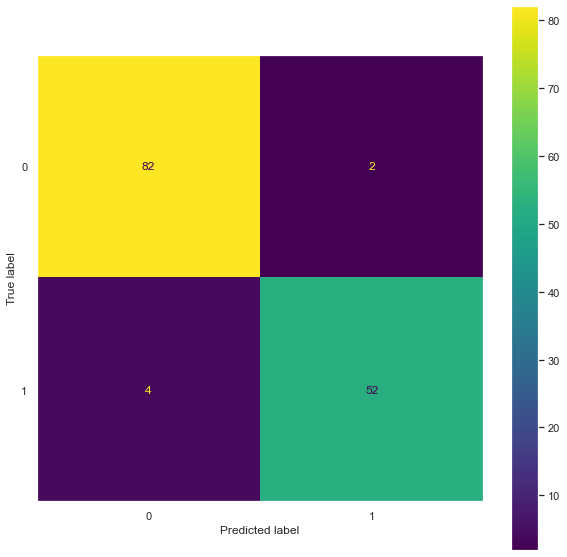

In [879]:
model = dt_output[idx]
metrics.plot_confusion_matrix(model, CX_test, CY_test)
plt.grid(False)
# ax.set_title('Decsion Tree Confusion Matrix')

[['Precision', 'Recall', 'Accuracy', 'Balanced Accuracy', 'Time'], [0.9629629629629629, 0.9285714285714286, 0.9571428571428572, 0.9523809523809523, 0.001940011978149414]]


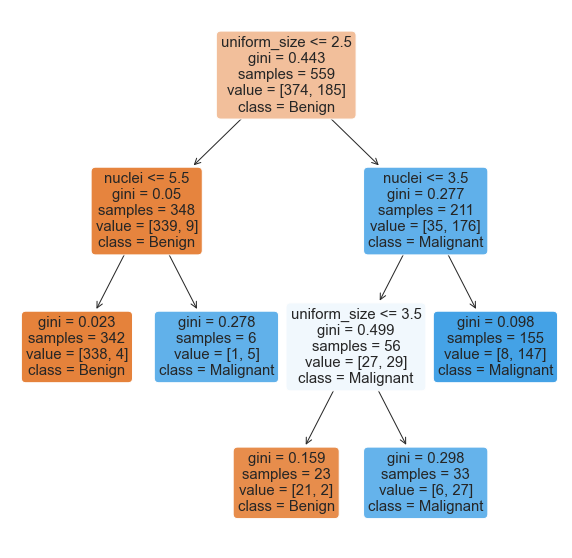

In [880]:
#printing dt 
# print(idx)
# print(dt_output[idx])
# # for model in output:
print(results)
# fig = plt.figure(figsize=(10, 100))
fig = plt.figure()
_ = tree.plot_tree(model, feature_names = x_features, class_names = class_name, filled = True, rounded = True)
# fig.savefig('test2.png', dpi = 1200)

In [881]:
def nn(x,y, x_test, y_test):
    model = MLPClassifier(random_state=0, activation='logistic', hidden_layer_sizes=(10,1))
    
#     #validation curve
#     train, val = valid(model, cancer_df_x, cancer_df_y,'learning_rate_init', [1e-5,1000], 5, 'Neural Network', 'Learning Rate' )
    train, val = valid(model, cancer_df_x, cancer_df_y,'n_iter_no_change', [1, 1000], 5, 'Neural Network', 'Iternations' )
#     train, val = valid(model, cancer_df_x, cancer_df_y,'hidden_layer_sizes', [1,1000], 5, 'Neural Network', 'Hidden Layer')
    #learning curve
    model = MLPClassifier(n_iter_no_change = 50, learning_rate_init=1e-3, hidden_layer_sizes=(10,1), random_state=0, activation='logistic')
#     loss_train = model.loss_curve_
    learning(model, cancer_df_x, cancer_df_y, 5, 'Neural Network')
    
    model.fit(x_test,y_test)
    loss_val = model.loss_curve_
    start = time.time()
    model.fit(x,y)
    wall_time = time.time() - start
    loss_train = model.loss_curve_
#     print(loss_values)
#     print(model.n_layers_)
#     plt.plot(nn_output)
    pred = model.predict(x_test)
    pre, rec, acc, mtx, bacc = prediction(pred, y_test)
    print('Precision: ',  pre)
    print('Recall: ',  rec)
    print('Accuracy: ',  acc)
    print('Balanced Accuracy: ', bacc)
    print(mtx)
    print('Wall time: ', wall_time)
    results.append([pre, rec, acc, bacc, wall_time])
    metrics.plot_confusion_matrix(model, x_test, y_test)
    plt.grid(False)
    return [loss_train, loss_val]
#     return loss_val
    

Precision:  1.0
Recall:  0.5
Accuracy:  0.8
Balanced Accuracy:  0.75
[[84  0]
 [28 28]]
Wall time:  0.1678311824798584


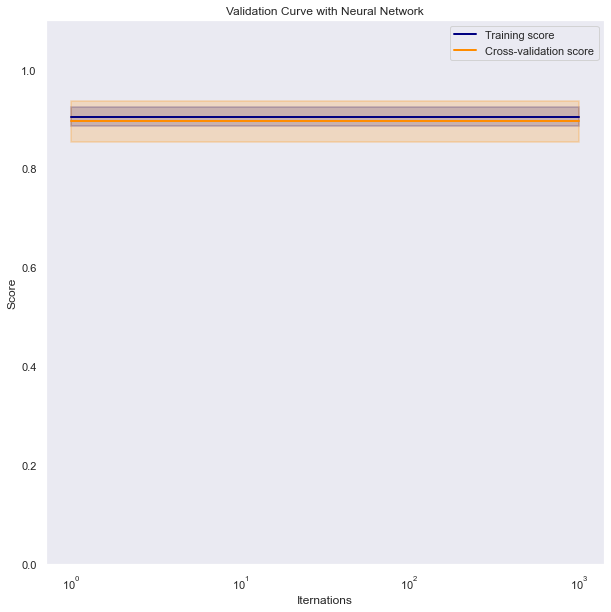

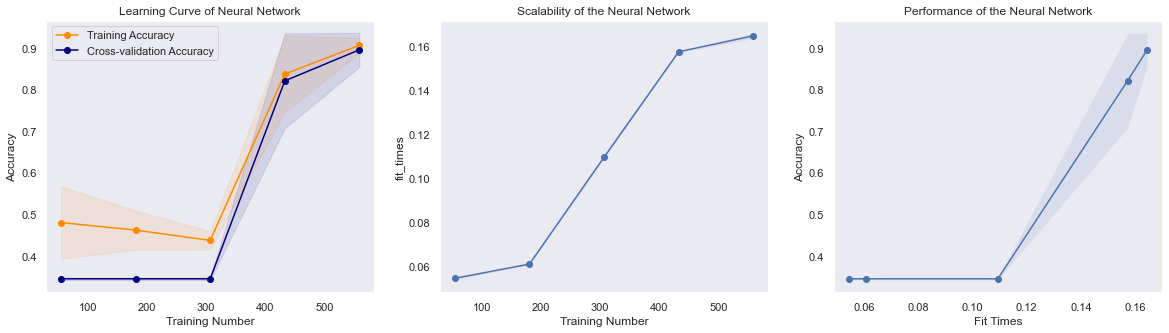

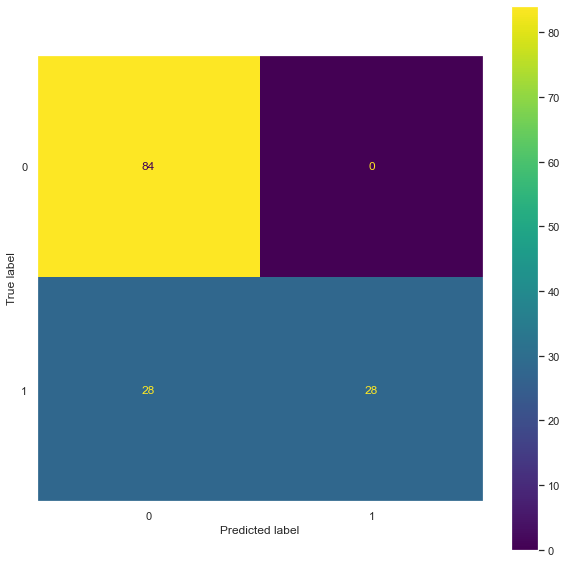

In [882]:
nn_output = nn(CX_train, CY_train, CX_test, CY_test)
#learning curve, validation curve, loss-curve
# for train_idx, test_idx in kf.split(cancer_np_x):
#     X_train, X_test =  cancer_np_x[train_idx], cancer_np_x[test_idx]
#     Y_train, Y_test = cancer_np_y[train_idx], cancer_np_y[test_idx]
#     nn(X_train, Y_train, X_test, Y_test)

Text(0.5, 1.0, 'Loss function of Neural Network')

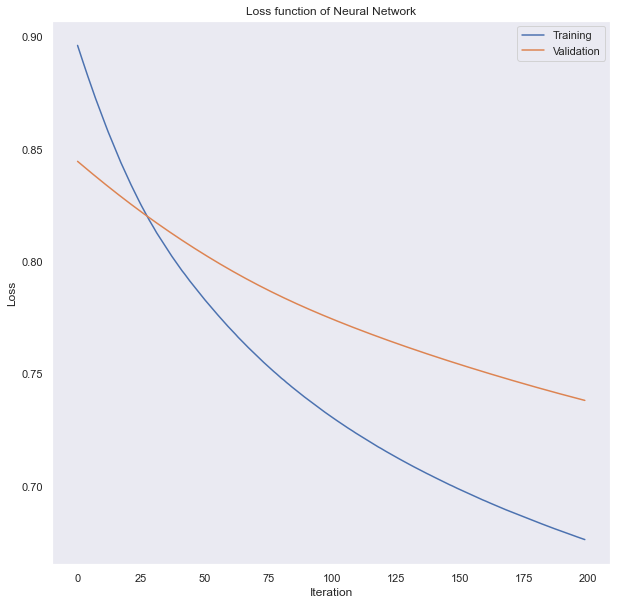

In [883]:
# print(nn_output)
ax = plt.plot(nn_output[0], label="Training")
plt.plot(nn_output[1], label="Validation")
plt.grid(False)
plt.legend(loc="upper right")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss function of Neural Network")

In [884]:
def boosting(x,y, x_test, y_test):
    model = AdaBoostClassifier(random_state=0)
    train, val = valid(model, cancer_df_x, cancer_df_y,'learning_rate', [1e-5, 1], 5, 'Adaboost', 'Learning Rate')
#     train, val = valid(model, cancer_df_x, cancer_df_y,'n_estimators', [1, 100], 5, 'Adaboost', 'Number or Estimators')
    
    model = AdaBoostClassifier(n_estimators=50, random_state=0, learning_rate = 0.01)
    learning(model, cancer_df_x, cancer_df_y, 5, 'Adaboost')
    start = time.time()
    model.fit(x,y)
    wall_time = time.time() - start
    pred = model.predict(x_test)
    
    pre, rec, acc, mtx, bacc = prediction(pred, y_test)
    print('Precision: ',  pre)
    print('Recall: ',  rec)
    print('Accuracy: ',  acc)
    print('Balanced Accuracy: ', bacc)
    print(mtx)
    print('Wall time: ', wall_time)
    results.append([pre, rec, acc, bacc, wall_time])
    metrics.plot_confusion_matrix(model, x_test, y_test)
    plt.grid(False)


Precision:  0.9615384615384616
Recall:  0.8928571428571429
Accuracy:  0.9428571428571428
Balanced Accuracy:  0.9345238095238095
[[82  2]
 [ 6 50]]
Wall time:  0.06439781188964844


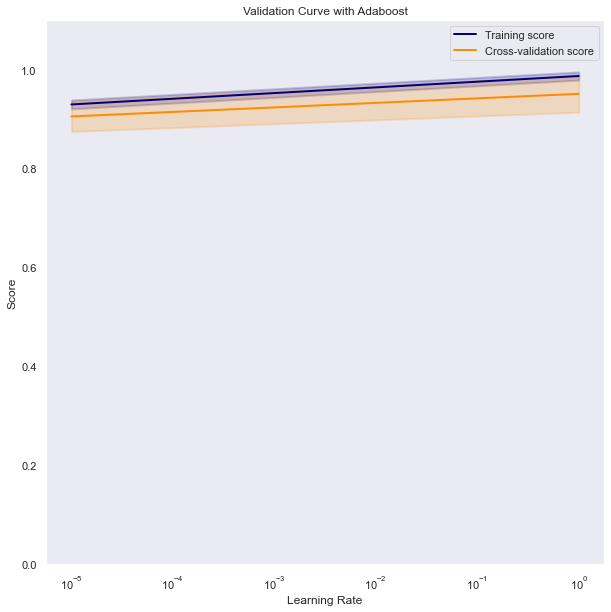

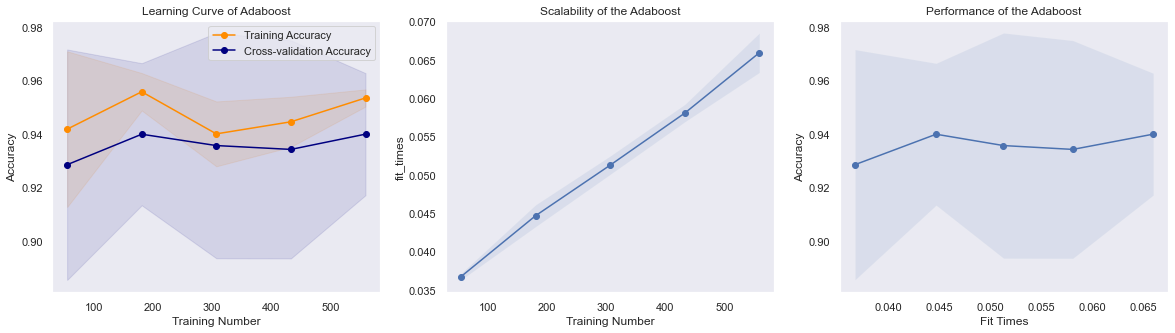

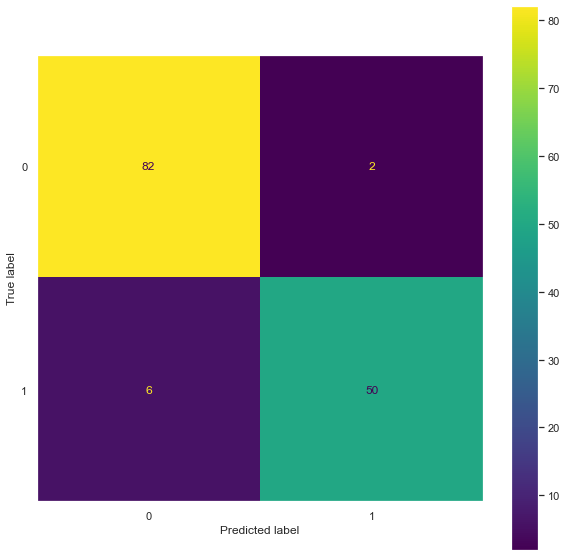

In [885]:
boost_output = boosting(CX_train, CY_train, CX_test, CY_test)

In [886]:
#two type of kernel function
def svm(x,y, x_test, y_test, kernelf,gamma):
    model = SVC(kernel = kernelf, random_state=0)
    train, val = valid(model, cancer_df_x, cancer_df_y,'gamma', np.logspace(-6, -1, 5), 5, 'SVM', r"$\gamma$")
#     train, val = valid(model, cancer_df_x, cancer_df_y,'C', [0.2,1.0], 5, 'SVM', 'C')
    
    model = SVC(kernel = kernelf, C=0.2, gamma =gamma,random_state=0)
    learning(model, cancer_df_x, cancer_df_y, 5, 'SVM')
    start = time.time()
    model.fit(x,y)
    wall_time = time.time() - start
    pred = model.predict(x_test)
    pre, rec, acc, mtx, bacc = prediction(pred, y_test)
    print('Precision: ',  pre)
    print('Recall: ',  rec)
    print('Accuracy: ',  acc)
    print('Balanced Accuracy: ', bacc)
    print(mtx)
    print('Wall time: ', wall_time)
    results.append([pre, rec, acc, bacc, wall_time])
    metrics.plot_confusion_matrix(model, x_test, y_test)
    plt.grid(False)

In [887]:
param_range = np.logspace(-6, -1, 5)
print(param_range)

[1.00000000e-06 1.77827941e-05 3.16227766e-04 5.62341325e-03
 1.00000000e-01]


Precision:  1.0
Recall:  0.9464285714285714
Accuracy:  0.9785714285714285
Balanced Accuracy:  0.9732142857142857
[[84  0]
 [ 3 53]]
Wall time:  0.005614042282104492


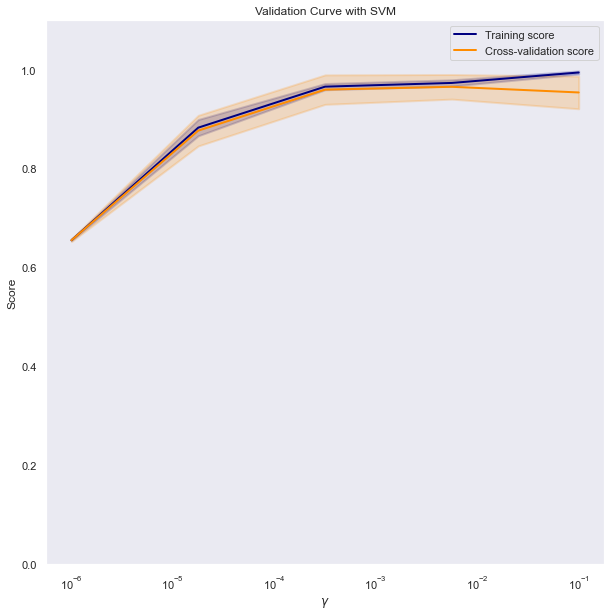

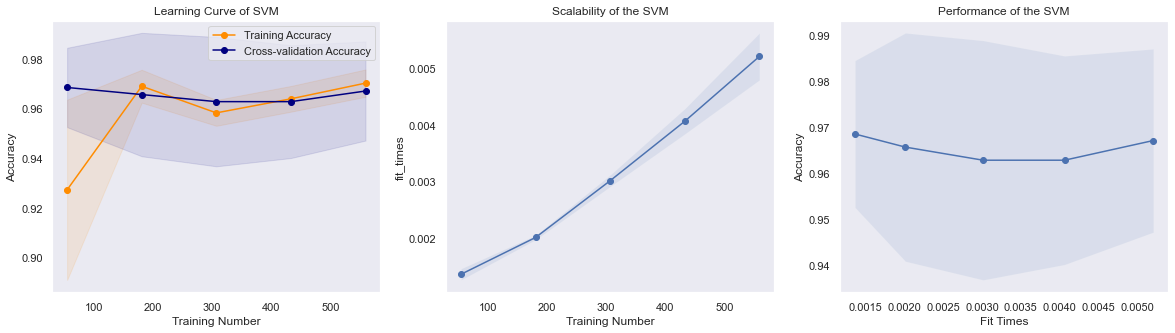

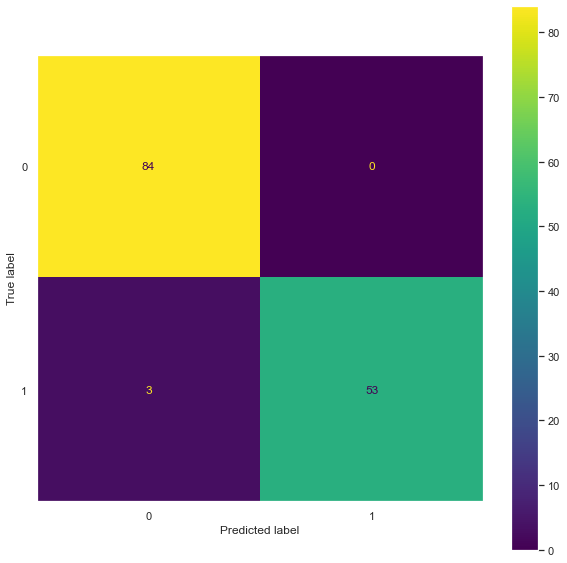

In [888]:
svm_output = svm(CX_train, CY_train, CX_test, CY_test, 'rbf', 5.62341325e-03)

Precision:  1.0
Recall:  0.8392857142857143
Accuracy:  0.9357142857142857
Balanced Accuracy:  0.9196428571428572
[[84  0]
 [ 9 47]]
Wall time:  0.027411937713623047


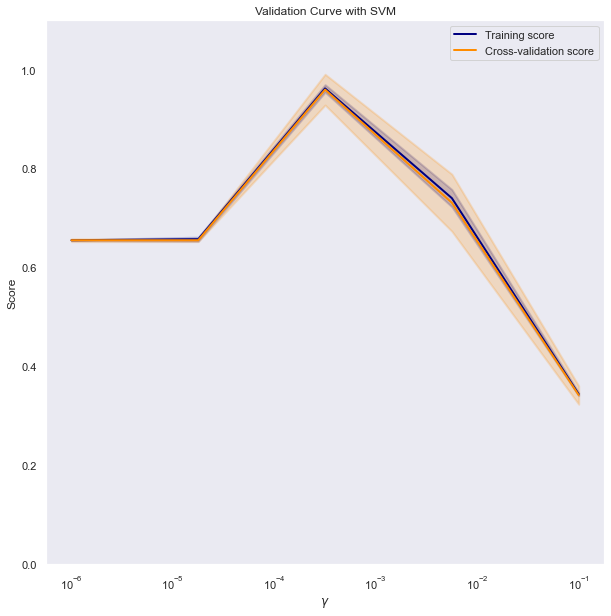

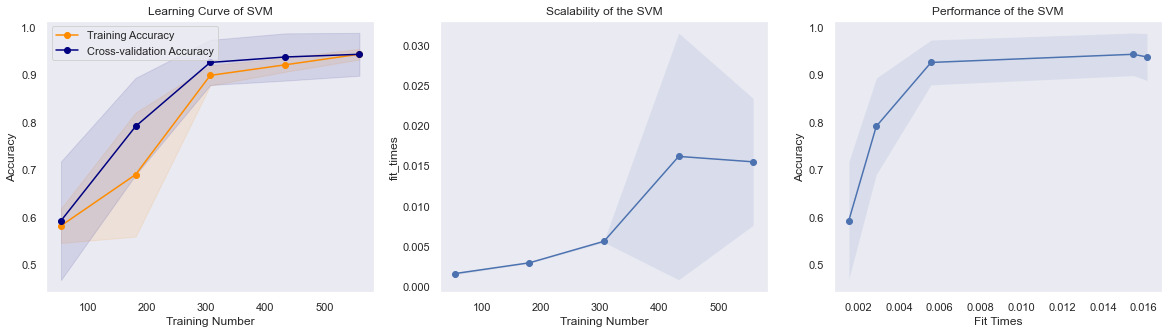

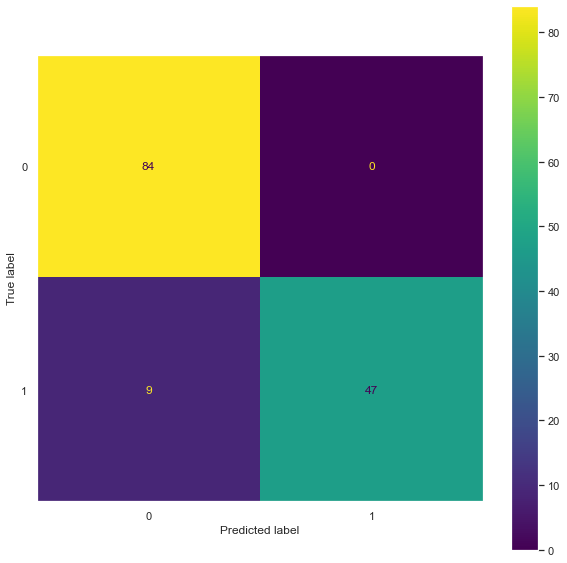

In [889]:
svm_output = svm(CX_train, CY_train, CX_test, CY_test, 'sigmoid', 3.16227766e-04)

In [890]:
#varying k
def knn(x,y, x_test, y_test, n):
    model = KNeighborsClassifier()
    train, val = valid(model, cancer_df_x, cancer_df_y,'n_neighbors', [1,100], 5, 'KNN', 'Number or Neighbors')
    
    model = KNeighborsClassifier(n_neighbors=n)
    learning(model, cancer_df_x, cancer_df_y, 5, 'KNN')
    start = time.time()
    model.fit(x,y)
    wall_time = time.time() - start
    pred = model.predict(x_test)
    pre, rec, acc, mtx, bacc = prediction(pred, y_test)
    print('Precision: ',  pre)
    print('Recall: ',  rec)
    print('Accuracy: ',  acc)
    print('Balanced Accuracy: ', bacc)
    print(mtx)
    print('Wall time: ', wall_time)
    results.append([pre, rec, acc, bacc, wall_time])
    metrics.plot_confusion_matrix(model, x_test, y_test)
    plt.grid(False)


Precision:  1.0
Recall:  0.9107142857142857
Accuracy:  0.9642857142857143
Balanced Accuracy:  0.9553571428571428
[[84  0]
 [ 5 51]]
Wall time:  0.0017290115356445312


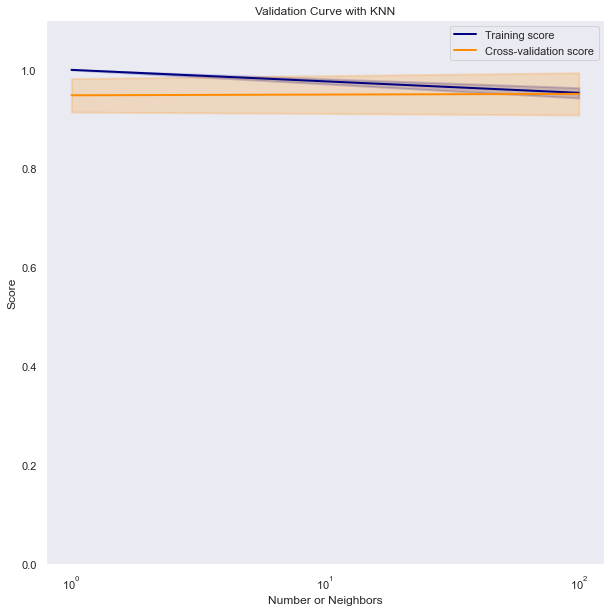

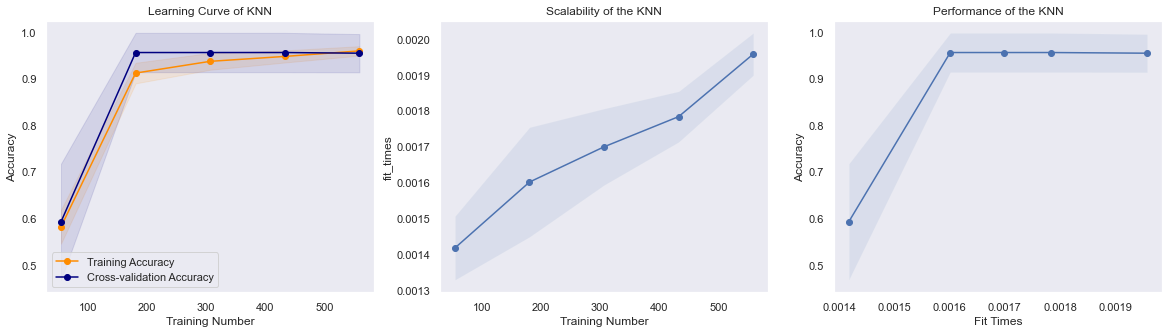

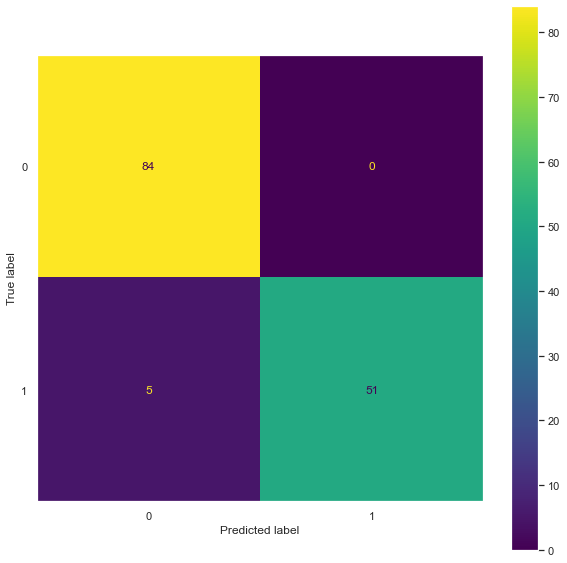

In [891]:
knn_output = knn(CX_train, CY_train, CX_test, CY_test, 50)

Precision:  1.0
Recall:  0.9107142857142857
Accuracy:  0.9642857142857143
Balanced Accuracy:  0.9553571428571428
[[84  0]
 [ 5 51]]
Wall time:  0.0018210411071777344


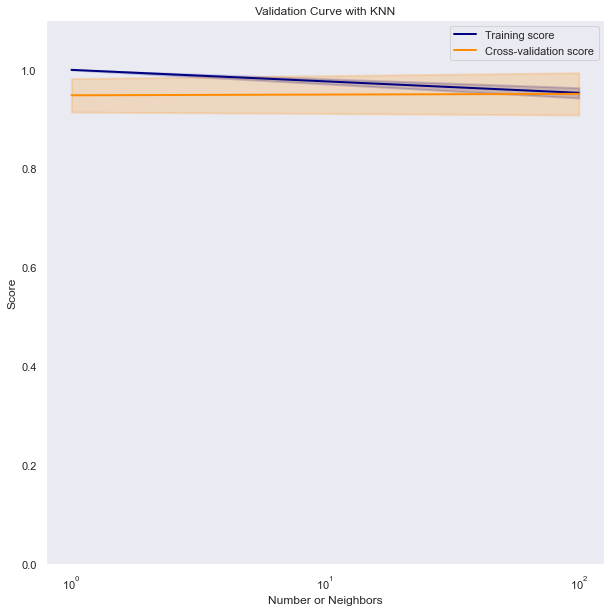

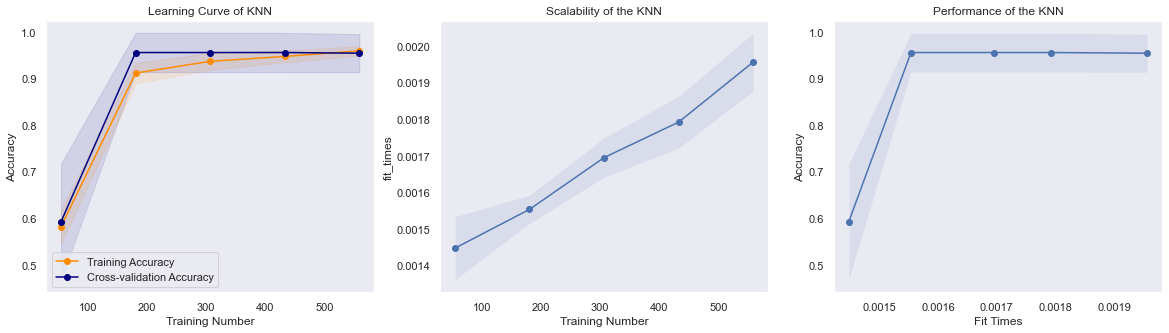

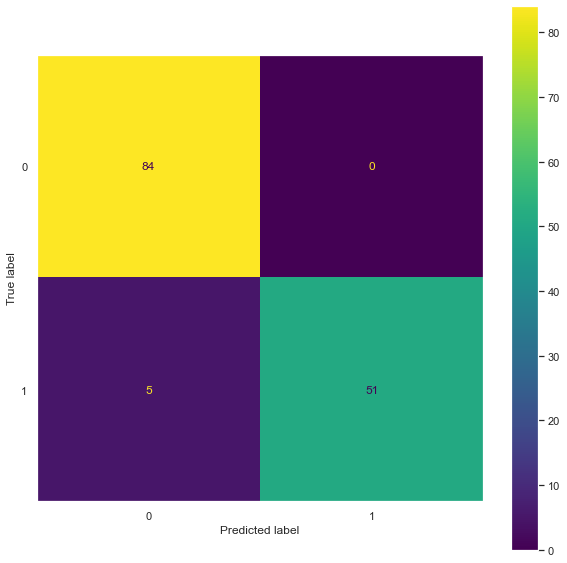

In [892]:
knn_output = knn(CX_train, CY_train, CX_test, CY_test, 50)

Precision:  1.0
Recall:  0.9107142857142857
Accuracy:  0.9642857142857143
Balanced Accuracy:  0.9553571428571428
[[84  0]
 [ 5 51]]
Wall time:  0.001911163330078125


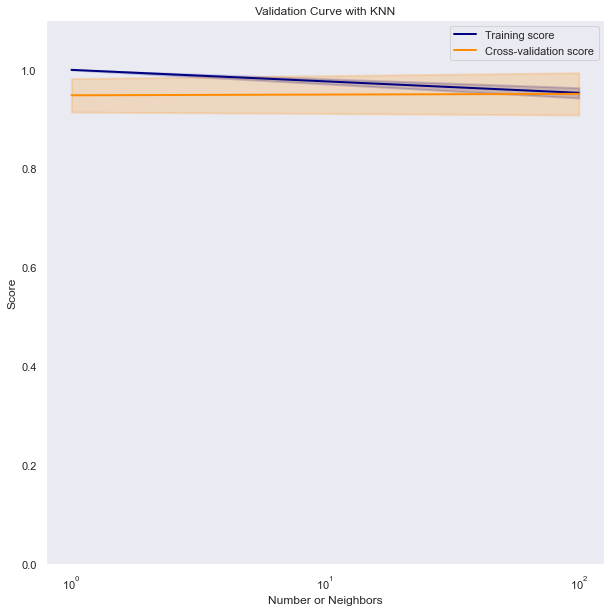

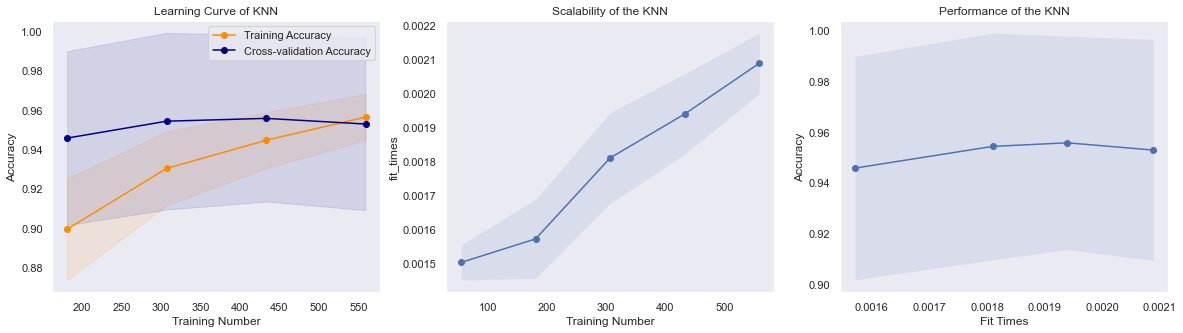

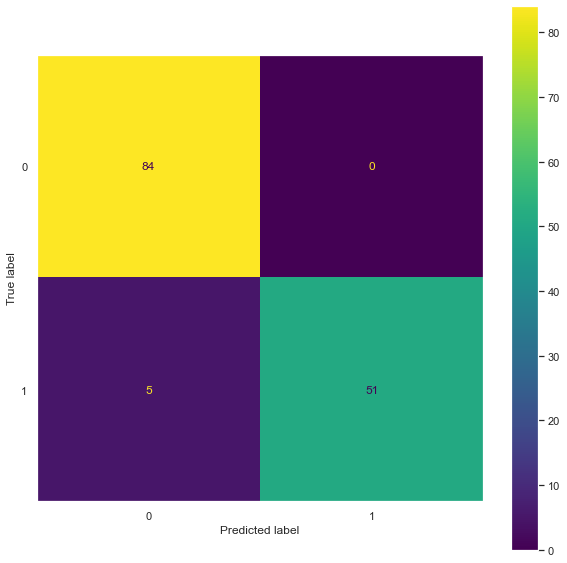

In [893]:
knn_output = knn(CX_train, CY_train, CX_test, CY_test, 60)

In [894]:
result_df = pd.DataFrame(results)
result_df

,0,1,2,3,4
0,Precision,Recall,Accuracy,Balanced Accuracy,Time
1,0.962963,0.928571,0.957143,0.952381,0.00194
2,1.0,0.5,0.8,0.75,0.167831
3,0.961538,0.892857,0.942857,0.934524,0.064398
4,1.0,0.946429,0.978571,0.973214,0.005614
5,1.0,0.839286,0.935714,0.919643,0.027412
6,1.0,0.910714,0.964286,0.955357,0.001729
7,1.0,0.910714,0.964286,0.955357,0.001821
8,1.0,0.910714,0.964286,0.955357,0.001911


In [865]:
# from sklearn.datasets import load_iris
# iris = load_iris()
# X, y = iris.data, iris.target
# print(y, iris.target_names)